In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow import keras
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
# Load dataset (replace 'data.csv' with your dataset)
data = pd.read_csv('SpaceShipTracking.csv')

In [3]:
print(data.head)
print(data.tail)
print(data.describe)

<bound method NDFrame.head of       Ship_ID PassengerId HomePlanet CryoSleep     Cabin    Destination   Age  \
0           1     0013_01      Earth      True     G/3/S    TRAPPIST-1e  27.0   
1           2     0018_01      Earth     False     F/4/S    TRAPPIST-1e  19.0   
2           3     0019_01     Europa      True     C/0/S    55 Cancri e  31.0   
3           4     0021_01     Europa     False     C/1/S    TRAPPIST-1e  38.0   
4           5     0023_01      Earth     False     F/5/S    TRAPPIST-1e  20.0   
...       ...         ...        ...       ...       ...            ...   ...   
4272     4275     9266_02      Earth      True  G/1496/S    TRAPPIST-1e  34.0   
4273     4276     9269_01      Earth     False       NaN    TRAPPIST-1e  42.0   
4274     4277     9271_01       Mars      True   D/296/P    55 Cancri e   NaN   
4275     4278     9273_01     Europa     False   D/297/P            NaN   NaN   
4276     4279     9277_01      Earth      True  G/1498/S  PSO J318.5-22  43.0  

In [6]:
data['Target'] = (data['Ship_ID'].shift(-1) > data['Ship_ID']).astype(int)

In [7]:
# Drop rows with NaN values
data.dropna(inplace=True)

In [8]:
# Gathering the Information
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Ship_ID', 'Age', 'Ship_class', 'Ship_Speed']])
print(scaled_data)

[[-1.72230575 -0.11206074 -1.12456132 -1.12297964]
 [-1.72149868 -0.67895371 -1.1250266  -1.12502197]
 [-1.72069161  0.17138574 -1.12673263 -1.12648825]
 ...
 [ 1.72630961  0.80914034  1.02844814  1.04282933]
 [ 1.72711668  0.38397061  1.02849983  1.0428817 ]
 [ 1.73034497  1.0217252   1.02870663  1.04309117]]


In [9]:
# Create features and target variable
X = scaled_data[:, :-1]
y = data['Target'].values

In [10]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
print(log_reg_accuracy)

1.0


In [13]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print(dt_accuracy)

1.0


In [14]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(rf_accuracy)

1.0


In [15]:
# K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_pred = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print(knn_accuracy)

1.0


In [16]:
# ARIMA Model
# Assuming you have time series data for ARIMA
# Splitting data for ARIMA
train_data = data[:int(0.8*(len(data)))]
test_data = data[int(0.8*(len(data))):]

In [17]:
# LSTM Model
# Assuming you have sequential data for LSTM
# Reshape the data
X_train_lstm = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [18]:
# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
lstm_model.add(LSTM(units=50, return_sequences=False))
lstm_model.add(Dense(units=1))

In [19]:
# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
# Train the model
lstm_model.fit(X_train_lstm, y_train, epochs=100, batch_size=32)

Epoch 1/100
82/82 [==============================] - 8s 6ms/step - loss: 0.2682
Epoch 2/100
82/82 [==============================] - 0s 6ms/step - loss: 0.0013
Epoch 3/100
82/82 [==============================] - 0s 6ms/step - loss: 6.4846e-04
Epoch 4/100
82/82 [==============================] - 0s 6ms/step - loss: 4.7505e-04
Epoch 5/100
82/82 [==============================] - 0s 6ms/step - loss: 4.2506e-04
Epoch 6/100
82/82 [==============================] - 1s 6ms/step - loss: 4.2607e-04
Epoch 7/100
82/82 [==============================] - 0s 6ms/step - loss: 3.8588e-04
Epoch 8/100
82/82 [==============================] - 1s 6ms/step - loss: 4.4984e-04
Epoch 9/100
82/82 [==============================] - 0s 6ms/step - loss: 4.2727e-04
Epoch 10/100
82/82 [==============================] - 0s 6ms/step - loss: 4.2713e-04
Epoch 11/100
82/82 [==============================] - 1s 6ms/step - loss: 4.3358e-04
Epoch 12/100
82/82 [==============================] - 0s 6ms/step - loss: 4.4189e-

In [21]:
# Predictions
lstm_predictions = lstm_model.predict(X_test_lstm)

21/21 [==============================] - 1s 5ms/step


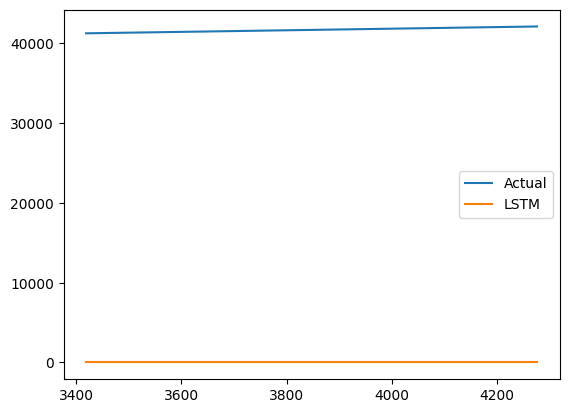

In [22]:
# Visualization (assuming you want to visualize predictions)
plt.plot(test_data.index, test_data['Ship_class'], label='Actual')
plt.plot(test_data.index, lstm_predictions, label='LSTM')
plt.legend()
plt.show()

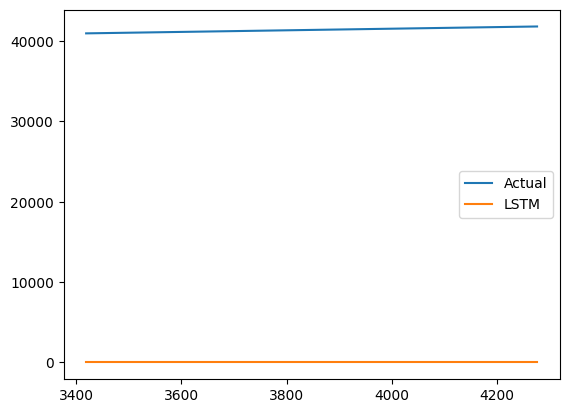

In [23]:
# Visualization (assuming you want to visualize predictions)
plt.plot(test_data.index, test_data['Ship_Speed'], label='Actual')
plt.plot(test_data.index, lstm_predictions, label='LSTM')
plt.legend()
plt.show()

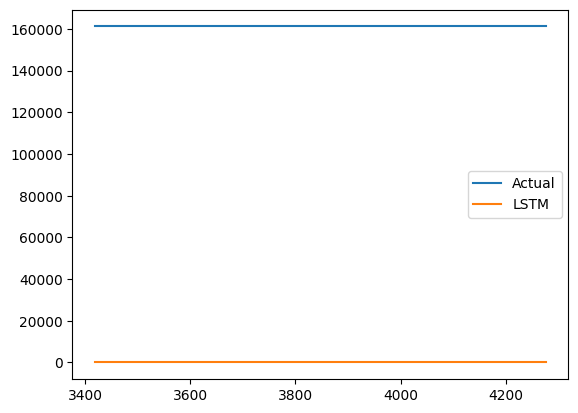

In [24]:
# Visualization (assuming you want to visualize predictions)
plt.plot(test_data.index, test_data['Ship_Fuel_Level'], label='Actual')
plt.plot(test_data.index, lstm_predictions, label='LSTM')
plt.legend()
plt.show()